In [1]:
import qpms
import numpy as np
from numpy import newaxis as nx
import math
import cmath
from scipy.constants import c, e as eV, hbar
s3 = math.sqrt(3)
J_scat = 3

In [2]:
epsilon_b = 2.3104
hexside = 375e-9
cdn = c/ math.sqrt(epsilon_b)

bz_0 = np.array((0,0,0.,))
bz_K1 = np.array((1.,0,0))*4*np.pi/3/hexside/s3
bz_K2 = np.array((1./2.,s3/2,0))*4*np.pi/3/hexside/s3
bz_M = np.array((3./4, s3/4,0))*4*np.pi/3/hexside/s3

# reciprocal lattice basis
B1 = 2* bz_K1 - bz_K2
B2 = 2* bz_K2 - bz_K1

In [3]:
kdensity = 100
k0Mlist = bz_0 + (bz_M-bz_0) * np.linspace(0,1,kdensity)[:,nx]
kMK1list = bz_M + (bz_K1-bz_M) * np.linspace(0,1,kdensity)[:,nx]
kK10list = bz_K1 + (bz_0-bz_K1) * np.linspace(0,1,kdensity)[:,nx]
k0K2list = bz_0 + (bz_K2-bz_0) * np.linspace(0,1,kdensity)[:,nx]
kK2Mlist = bz_K2 + (bz_M-bz_K2) * np.linspace(0,1,kdensity)[:,nx]
klist = np.concatenate((k0Mlist,kMK1list,kK10list,k0K2list,kK2Mlist), axis=0)
kxmaplist = np.concatenate((np.array([0]),np.cumsum(np.linalg.norm(np.diff(klist, axis=0), axis=-1))))

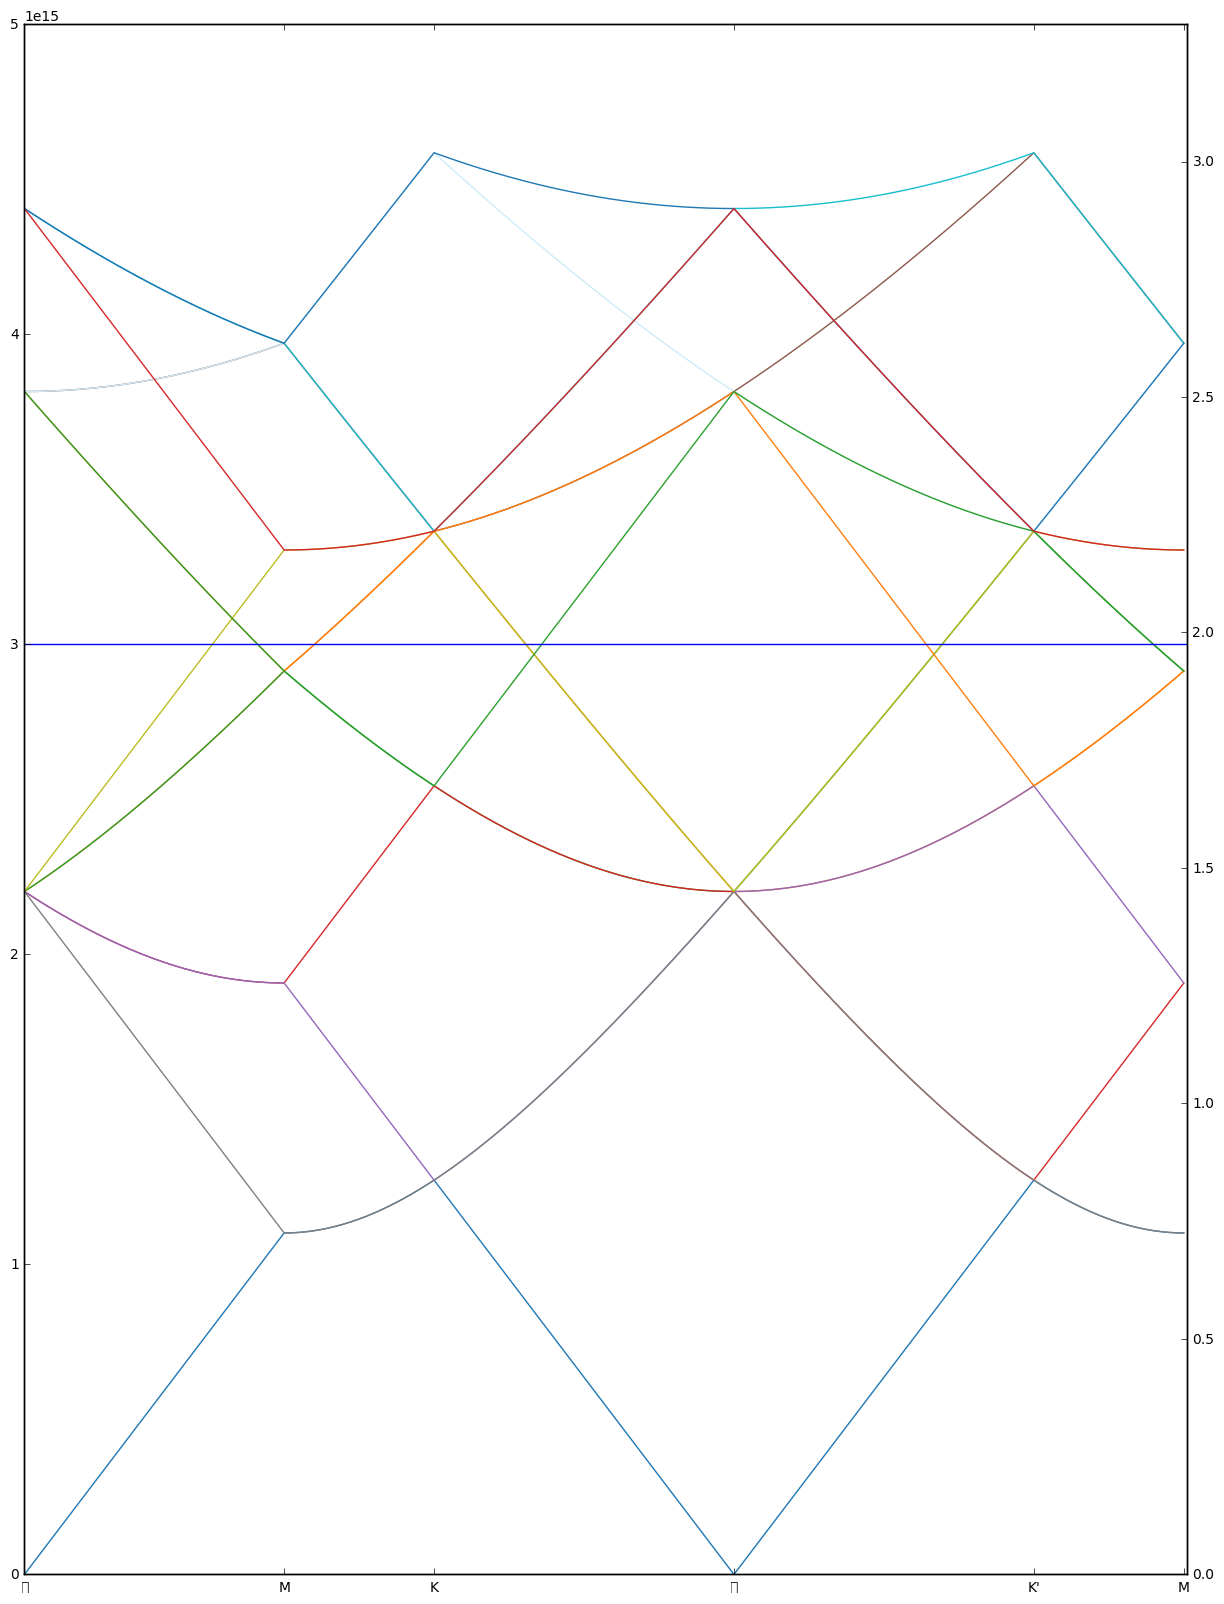

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(15,20))
ax.plot(kxmaplist, np.linalg.norm(klist,axis=-1)*cdn, '-',
       kxmaplist, np.linalg.norm(klist+B1, axis=-1)*cdn, '-',
       kxmaplist, np.linalg.norm(klist+B2, axis=-1)*cdn, '-',
       kxmaplist, np.linalg.norm(klist-B2, axis=-1)*cdn, '-',
       kxmaplist, np.linalg.norm(klist-B1, axis=-1)*cdn, '-',
       kxmaplist, np.linalg.norm(klist+B2-B1, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist-B2+B1, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist-B2-B1, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist+B2+B1, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist-2*B1, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist-2*B2, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist-2*B2-B1, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist-2*B1-B2, axis=-1)*cdn, '-',
        kxmaplist, np.linalg.norm(klist-2*B1-2*B2, axis=-1)*cdn, '-',
#        kxmaplist, np.linalg.norm(klist+2*B2-B1, axis=-1)*cdn, '-',
#        kxmaplist, np.linalg.norm(klist+2*B1-B2, axis=-1)*cdn, '-',
       )

#ax.set_xlim([np.min(kxmlarr),np.max(kxmlarr)])
#ax.set_ylim([np.min(omegalist),np.max(omegalist)])
ax.set_xticks([0, kxmaplist[len(k0Mlist)-1], kxmaplist[len(k0Mlist)+len(kMK1list)-1], kxmaplist[len(k0Mlist)+len(kMK1list)+len(kK10list)-1], kxmaplist[len(k0Mlist)+len(kMK1list)+len(kK10list)+len(k0K2list)-1], kxmaplist[len(k0Mlist)+len(kMK1list)+len(kK10list)+len(k0K2list)+len(kK2Mlist)-1]])
ax.set_xticklabels(['Γ', 'M', 'K', 'Γ', 'K\'','M'])
ax.axhline(3e15)
ax2 = ax.twinx()
ax2.set_ylim([ax.get_ylim()[0]/eV*hbar,ax.get_ylim()[1]/eV*hbar])
f.savefig("diforder.pdf")
